#  **<span style="color:orange">Binary Classification with PyCaret - Beginner's Guide</span>**

---

### **🚀 Lab Overview**

In this lab, you will learn the basics of binary classification using PyCaret 🤖. You will cover data preparation 📊, model training 🧑‍💻, evaluation 📈, and selection of the best model 🔍, providing a hands-on introduction to classification tasks. By the end of this lab, you’ll have a clear understanding of how to create and evaluate binary classification models in Python 🐍.


### **📘 Lab Scenario**
You are working with a dataset from the finance domain. Your objective is to **predict if a customer is a credit risk or not**. By using PyCaret, you’ll:

* **Load and preprocess** the data automatically.

* **Compare** multiple classification models.

* **Finalize and deploy** the best-performing model.

---

### **🎯 Lab Goals**
📥 **Load and prepare a dataset** for binary classification.

⚙️ Use **PyCaret’s Functional API** to automate ML workflows.

🧠 **Compare and select the best model** using compare_models().

💾 **Finalize** and save your trained model.

🌐 Create a **Gradio web app** for real-time predictions.

☁️ Explore deployment using **Azure and GCP**.

---

### **🛠 Step 1: Install & Import Required Libraries**

We start by installing and importing the essential libraries for building and deploying our classification model.

#### **🔍 Explanation**
- **Installing PyCaret**: 
  - For Local Jupyter Notebook: Use `pip install pycaret` (without `!`).
  - For Azure Notebooks: Use `!pip install pycaret` (with `!` at the start).
- **Installing Joblib**: Used to save and load machine learning models.
- **Importing Libraries**: 
  - `pycaret.classification` for classification model workflows.
  - `joblib` for model persistence.

#### **📚 Key Concepts**
- **PyCaret**: Simplifies training, tuning, and comparing machine learning models.
- **Joblib**: Efficiently saves and loads Python objects (like models).

#### **📈 Result**
Required libraries are installed based on your environment and are ready for use.


In [1]:
# For Local Jupyter Notebook (remove '!' if running locally)
# pip install pycaret

# For Google Colab or Azure Notebooks (keep '!' for shell command)
!pip install pycaret

# Install joblib (optional if not installed)
!pip install joblib

# Import libraries
from pycaret.classification import *
import joblib


### **Step 2: Downgrade NumPy to a Compatible Version**

We now downgrade to a version that works well with the rest of our machine learning stack.

#### **🔍 Updated Explanation**

- **PyCaret 3.3.2** and many other packages require **NumPy < 2.0**.

- So we must use **NumPy 1.26.4** — the highest version supported by all our tools.

- This fixes version conflicts that may break model training or evaluation.

### **⚡ Important Note on Warning**

You might see a warning like:  
`"WARNING: Failed to remove contents in a temporary directory..."`

 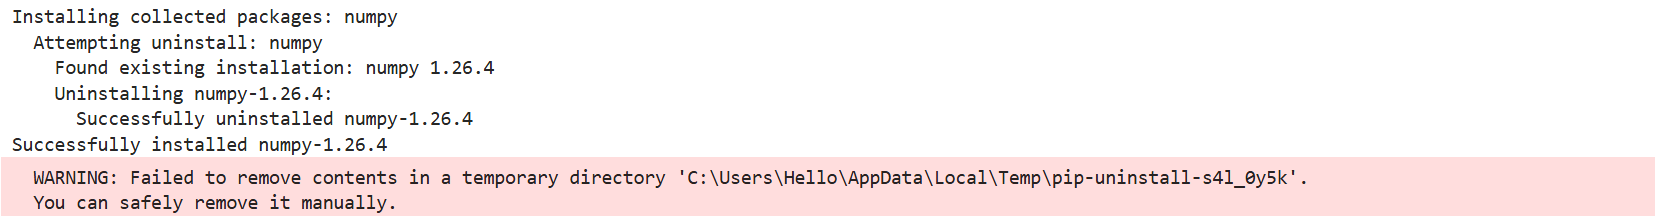

- This is **just a warning**, **not an error**.
- It happens because Pip couldn’t delete some temporary files (maybe locked or in use).
- ✅ You can **safely ignore** this warning. It does not affect the installation.

In [2]:
!pip install numpy==1.26.4 --force-reinstall --upgrade --no-cache-dir


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.5 MB 8.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.8/15.5 MB 4.2 MB/s eta 0:00:04
   -------- ------------------------------- 3.1/15.5 MB 4.2 MB/s eta 0:00:03
   ---------- ----------------------------- 3.9/15.5 MB 4.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/15.5 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/15.5 MB 4.1 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/15.5 MB 4.0 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/15.5 MB 4.0 MB/s eta 0:00:03
   --------------------- ------------------ 8.4/15.5 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 9.2/15.5 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 10.0/15.5 MB 3.9 MB/s eta 0:00:02
   ---------------------------- ----------- 11.0/15.5 MB 3.9 MB/s eta 0:00:02
   -

  You can safely remove it manually.


### **Step 3: Install PyCaret with Compatible NumPy Version**

To avoid compatibility issues, we first downgrade NumPy and then install PyCaret.

#### **🔍 Explanation**

- ```!pip install numpy --upgrade --ignore-installed```

     - **Upgrades NumPy** to the latest version.

     - ```--ignore-installed```: Forces reinstallation even if NumPy is already installed.

     - ⚠️ Note: The latest version may cause conflicts with PyCaret, so we'll later adjust this if needed.

- ```!pip install pycaret```

     - Installs the **PyCaret library**, which automates tasks like preprocessing, model selection, tuning, and evaluation.

     - Useful for rapid experimentation and building production-ready ML models with minimal code.

- ```from pycaret.classification import```

     - Imports **PyCaret’s classification module**, giving access to setup, compare_models, create_model, tune_model, etc.

✅ After this step, we’re ready to load the dataset and start the machine learning workflow.

In [3]:
!pip install numpy==1.26.4 --force-reinstall --upgrade --no-cache-dir
!pip install pycaret
from pycaret.classification import *


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/15.5 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.5 MB 4.4 MB/s eta 0:00:04
   -------- ------------------------------- 3.1/15.5 MB 4.1 MB/s eta 0:00:04
   ---------- ----------------------------- 4.2/15.5 MB 4.0 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/15.5 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/15.5 MB 3.9 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/15.5 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/15.5 MB 3.9 MB/s eta 0:00:03
   --------------------- ------------------ 8.4/15.5 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 9.2/15.5 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 10.0/15.5 MB 3.9 MB/s eta 0:00:02
   --------------------------- ------------ 10.7/15.5 MB 3.9 MB/s eta 0:00:02
   -

### **🛠 Step 5: Load and Check the Shape of the Dataset**

In this step, we load the 'credit' dataset from PyCaret's built-in datasets and check its shape to understand the structure of the data.

#### **🔍 Explanation**
- **Loading the Dataset**: We use `get_data('credit')` from PyCaret's `datasets` module to load the predefined 'credit' dataset.
- **Shape of the Dataset**: `.shape` provides the number of rows and columns in the dataset, giving a quick overview of its size.

#### **📚 Key Concepts**
- **get_data()**: A PyCaret function that loads predefined datasets for use in machine learning tasks.
- **Shape**: A property of Pandas DataFrames that returns a tuple representing the dimensions (rows, columns) of the dataset.

#### **📈 Result**
The shape of the dataset is displayed, showing the number of rows and columns, which helps us understand the data structure.


In [4]:
from pycaret.datasets import get_data

# Load the 'credit' dataset
dataset = get_data('credit')

# Check the shape of the dataset
dataset.shape

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


(24000, 24)

### **🔄 Step 6: Split the Dataset into Training and Unseen Data**

We will now split the dataset into two parts: one for model training and the other for making predictions later.

#### **🔍 Explanation**

- ```dataset.sample(frac=0.95, random_state=786)```:

     - This randomly selects **95%** of the dataset for training.

     - ```frac=0.95``` ensures 95% of the data is used.

     - ```random_state=786``` ensures the selection is reproducible.

- ```.reset_index(drop=True)```:
Resets the index of the resulting DataFrame, ensuring it’s clean (without the old index values).

- ```dataset.drop(data.index)```:
The remaining 5% of the data is used as the unseen data for predictions. It is removed from the training set.

- ```print('Data for Modeling: ' + str(data.shape))```:
Prints the dimensions (rows and columns) of the data being used for training.

- ```print('Unseen Data For Predictions: ' + str(data_unseen.shape))```:
Prints the dimensions of the unseen data that will be used for testing and making predictions.

**✅ This step divides the data into training data and unseen data to evaluate the model after training.**|

In [5]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


### **⚙️ Step 7: Initialize PyCaret Setup**

In this step, we initialize the PyCaret setup with the training data. This step prepares the environment for model training.

#### **🔍 Explanation**

- ```setup(data = data, target = 'default', session_id=123)```:

  - ```data = data```: Specifies the training dataset that we created in Step 6 (95% of the original dataset).

  - ```target = 'default'```: Specifies the target variable or the column in the dataset that we are trying to predict. Here, the target column is ```'default'```, which could represent whether someone defaulted on a loan (for example).

  - ```session_id=123```: Sets a random seed (session ID) to ensure reproducibility of the setup across different runs. This guarantees that the results will be consistent each time you run the setup.

**✅ This step initializes the PyCaret environment, performs preprocessing, and prepares the data for model training.**

In [6]:
exp_clf101 = setup(data = data, target = 'default', session_id=123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


### **🛠 Step 8: Initialize Setup and Compare Models**

In this step, we initialize the setup for our dataset and then compare different classification models to identify the best-performing one.

#### **🔍 Explanation**
- **setup()**: Initializes the environment by performing tasks like data splitting, encoding categorical features, and handling missing values.
  - `data=dataset`: The dataset we are using for the classification task.
  - `target='default'`: The column we're trying to predict (the target variable).
  - `session_id=123`: A random seed to ensure reproducibility of results.
- **compare_models()**: Compares a variety of machine learning models to determine the best one based on performance metrics.

#### **📚 Key Concepts**
- **setup()**: A PyCaret function that prepares the data for machine learning by preprocessing it.
- **compare_models()**: A function that compares various models and ranks them based on their performance.

#### **📈 Result**
After running `compare_models()`, PyCaret will output a table showing the performance metrics of multiple classification models, helping us identify the most suitable model.


In [7]:
from pycaret.classification import *

# Assuming 'dataset' is the correct variable
exp_clf101 = setup(data=dataset, target='default', session_id=123)

# Now compare models
compare_models()

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,12.1180
lightgbm,Light Gradient Boosting Machine,0.8203,0.7768,0.3756,0.6664,0.4802,0.3816,0.4047,1.5050
ada,Ada Boost Classifier,0.8186,0.7748,0.3325,0.6850,0.4473,0.3541,0.3874,2.5690
lda,Linear Discriminant Analysis,0.8129,0.7226,0.2719,0.6985,0.3910,0.3049,0.3527,0.1710
rf,Random Forest Classifier,0.8124,0.7645,0.3670,0.6313,0.4637,0.3596,0.3793,6.8000
et,Extra Trees Classifier,0.8089,0.7516,0.3667,0.6142,0.4590,0.3518,0.3692,4.1020
lr,Logistic Regression,0.8062,0.7108,0.2267,0.6897,0.3403,0.2595,0.3154,7.3140
ridge,Ridge Classifier,0.8014,0.7226,0.1621,0.7296,0.2650,0.2008,0.2782,0.1770
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1370
knn,K Neighbors Classifier,0.7507,0.5971,0.1826,0.3705,0.2443,0.1154,0.1259,1.0840


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### **🤖 Step 8: Create the Random Forest Model**

In this step, we create the Random Forest model using the PyCaret library.

#### **🔍 Explanation**

- ```create_model('rf')```:

  - ```'rf'```: Specifies the model type you want to create. Here, ```'rf'``` stands for **Random Forest**, which is an ensemble learning method that combines multiple decision trees to make predictions.

  - ```create_model```: This function in PyCaret automatically handles the creation and training of the specified model. In this case, it will create and train a Random Forest classifier using the training dataset you provided during the ```setup``` step.

✅ This step quickly sets up the Random Forest classifier for your classification task.

In [8]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7601,0.3908,0.6332,0.4833,0.3786,0.3949
1,0.8042,0.7513,0.3801,0.5875,0.4615,0.3485,0.3609
2,0.8119,0.7523,0.3585,0.6303,0.4570,0.3535,0.3741
3,0.8149,0.7945,0.3747,0.6376,0.4720,0.3688,0.3880
4,0.8190,0.7661,0.3585,0.6683,0.4667,0.3694,0.3955
5,0.8030,0.7525,0.3531,0.5901,0.4418,0.3312,0.3474
6,0.8202,0.7732,0.4059,0.6509,0.5000,0.3975,0.4140
7,0.8113,0.7647,0.3629,0.6279,0.4600,0.3554,0.3750
8,0.8190,0.7730,0.3495,0.6771,0.4610,0.3653,0.3942


### **🤖 Step 9: Tune the Random Forest Model**

In this step, we tune the Random Forest model to optimize its hyperparameters for better performance.

#### **🔍 Explanation**

- ```tune_model(rf)```:

  - ```tune_model```: This function in PyCaret performs hyperparameter tuning on the model provided as an argument. It uses techniques like **grid search** and **randomized search** to find the best possible combination of hyperparameters for the model.

  - ```rf```: Refers to the Random Forest model you previously created. The function will optimize the hyperparameters of this model to improve its performance on the dataset.

✅ This step helps improve the model's performance by adjusting parameters like the number of trees (estimators), maximum depth, and others, so that it can make more accurate predictions.

In [9]:
from pycaret.classification import *

# Create the 'rf' model first
rf = create_model('rf')

# Now you can tune the model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7601,0.3908,0.6332,0.4833,0.3786,0.3949
1,0.8042,0.7513,0.3801,0.5875,0.4615,0.3485,0.3609
2,0.8119,0.7523,0.3585,0.6303,0.4570,0.3535,0.3741
3,0.8149,0.7945,0.3747,0.6376,0.4720,0.3688,0.3880
4,0.8190,0.7661,0.3585,0.6683,0.4667,0.3694,0.3955
5,0.8030,0.7525,0.3531,0.5901,0.4418,0.3312,0.3474
6,0.8202,0.7732,0.4059,0.6509,0.5000,0.3975,0.4140
7,0.8113,0.7647,0.3629,0.6279,0.4600,0.3554,0.3750
8,0.8190,0.7730,0.3495,0.6771,0.4610,0.3653,0.3942


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8179,0.7621,0.3450,0.6702,0.4555,0.3594,0.3880
1,0.8125,0.7524,0.3423,0.6414,0.4464,0.3459,0.3706
2,0.8214,0.7588,0.3477,0.6898,0.4624,0.3690,0.4001
3,0.8292,0.7712,0.4097,0.6909,0.5144,0.4188,0.4399
4,0.8220,0.7676,0.3208,0.7169,0.4432,0.3552,0.3960
5,0.8095,0.7366,0.3612,0.6175,0.4558,0.3498,0.3683
6,0.8315,0.7667,0.4220,0.6978,0.5260,0.4310,0.4511
7,0.8244,0.7589,0.3790,0.6878,0.4887,0.3933,0.4187
8,0.8274,0.7735,0.3737,0.7092,0.4894,0.3973,0.4269


Fitting 10 folds for each of 10 candidates, totalling 100 fits


### **🤖 Step 10: Predict with Tuned Random Forest Model**

Now that we have a fine-tuned Random Forest model, it’s time to make predictions using it.

#### **🔍 Explanation**

- ```predict_model(tuned_rf)```:

  - ```predict_model```: This function from PyCaret takes a trained and tuned model (in this case, ```tuned_rf```) and uses it to predict the target variable for each row in the dataset.

  - ```tuned_rf```: This refers to the Random Forest model you previously tuned using ```tune_model```. It is now optimized for better performance based on hyperparameter adjustments.

The function adds a new column in the dataset with the predicted values for the target variable.

✅ **Result**: By calling ```predict_model(tuned_rf)```, the model generates predictions on the dataset, which can be used to evaluate the model's performance and analyze how well it is making predictions.

In [10]:
from pycaret.classification import *

# Set up the environment if not already done
# setup(data, target='your_target_column')  # Ensure data is set up

# Create and tune the random forest model
tuned_rf = tune_model(create_model('rf'))

# Now, you can use predict_model with the tuned model
predictions = predict_model(tuned_rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7601,0.3908,0.6332,0.4833,0.3786,0.3949
1,0.8042,0.7513,0.3801,0.5875,0.4615,0.3485,0.3609
2,0.8119,0.7523,0.3585,0.6303,0.4570,0.3535,0.3741
3,0.8149,0.7945,0.3747,0.6376,0.4720,0.3688,0.3880
4,0.8190,0.7661,0.3585,0.6683,0.4667,0.3694,0.3955
5,0.8030,0.7525,0.3531,0.5901,0.4418,0.3312,0.3474
6,0.8202,0.7732,0.4059,0.6509,0.5000,0.3975,0.4140
7,0.8113,0.7647,0.3629,0.6279,0.4600,0.3554,0.3750
8,0.8190,0.7730,0.3495,0.6771,0.4610,0.3653,0.3942


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8179,0.7621,0.3450,0.6702,0.4555,0.3594,0.3880
1,0.8125,0.7524,0.3423,0.6414,0.4464,0.3459,0.3706
2,0.8214,0.7588,0.3477,0.6898,0.4624,0.3690,0.4001
3,0.8292,0.7712,0.4097,0.6909,0.5144,0.4188,0.4399
4,0.8220,0.7676,0.3208,0.7169,0.4432,0.3552,0.3960
5,0.8095,0.7366,0.3612,0.6175,0.4558,0.3498,0.3683
6,0.8315,0.7667,0.4220,0.6978,0.5260,0.4310,0.4511
7,0.8244,0.7589,0.3790,0.6878,0.4887,0.3933,0.4187
8,0.8274,0.7735,0.3737,0.7092,0.4894,0.3973,0.4269


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8185,0.7455,0.3185,0.6955,0.4369,0.3460,0.3837


### **🤖 Step 11: Predict with Tuned Random Forest Model**

In this step, we use the tuned Random Forest model to make predictions on the dataset.

#### **🔍 Explanation**

- ```predict_model(tuned_rf)```:

  - ```predict_model```: This function from PyCaret takes the tuned Random Forest model (```tuned_rf```) and applies it to the data to predict the target variable for each row.

  - ```tuned_rf```: This is the optimized Random Forest model created in the previous step using ```tune_model```. It now contains the best hyperparameters to make the most accurate predictions.

This function generates a new column with the predicted values for the target variable in the dataset.

✅ **Result**:By running predict_model(tuned_rf), you can view how well the model performs and evaluate the predictions made on the dataset.

In [11]:
# Step 1: Create the Random Forest model
rf = create_model('rf')

# Step 2: Tune the Random Forest model
tuned_rf = tune_model(rf)

# Step 3: Use the tuned model to make predictions
predictions = predict_model(tuned_rf)

# Optionally, display the predictions
print(predictions)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7601,0.3908,0.6332,0.4833,0.3786,0.3949
1,0.8042,0.7513,0.3801,0.5875,0.4615,0.3485,0.3609
2,0.8119,0.7523,0.3585,0.6303,0.4570,0.3535,0.3741
3,0.8149,0.7945,0.3747,0.6376,0.4720,0.3688,0.3880
4,0.8190,0.7661,0.3585,0.6683,0.4667,0.3694,0.3955
5,0.8030,0.7525,0.3531,0.5901,0.4418,0.3312,0.3474
6,0.8202,0.7732,0.4059,0.6509,0.5000,0.3975,0.4140
7,0.8113,0.7647,0.3629,0.6279,0.4600,0.3554,0.3750
8,0.8190,0.7730,0.3495,0.6771,0.4610,0.3653,0.3942


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8179,0.7621,0.3450,0.6702,0.4555,0.3594,0.3880
1,0.8125,0.7524,0.3423,0.6414,0.4464,0.3459,0.3706
2,0.8214,0.7588,0.3477,0.6898,0.4624,0.3690,0.4001
3,0.8292,0.7712,0.4097,0.6909,0.5144,0.4188,0.4399
4,0.8220,0.7676,0.3208,0.7169,0.4432,0.3552,0.3960
5,0.8095,0.7366,0.3612,0.6175,0.4558,0.3498,0.3683
6,0.8315,0.7667,0.4220,0.6978,0.5260,0.4310,0.4511
7,0.8244,0.7589,0.3790,0.6878,0.4887,0.3933,0.4187
8,0.8274,0.7735,0.3737,0.7092,0.4894,0.3973,0.4269


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8185,0.7455,0.3185,0.6955,0.4369,0.3460,0.3837


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
21784     210000    1          1         2   33     -1     -1     -1     -1   
4076      200000    2          2         1   43      2      2      2      2   
4720      250000    1          2         2   30      0      0      0      0   
13065      80000    2          3         1   40     -1      0      0      0   
4555       50000    2          1         2   26      1     -2     -2     -2   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
15780     170000    2          1         2   32     -1     -1     -1     -1   
12000     110000    1          3         1   43      0      0      0      0   
16320     200000    1          1         1   27      2      2      2      2   
4295       50000    2          2         0   28      1      2      0      0   
21119     400000    2          3         1   47     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  P

### **🚀 Step 12: Finalize the Tuned Model**

In this step, we finalize the tuned model to make it ready for use and deployment.

#### **🔍 Explanation**

- ```finalize_model(tuned_rf)```:

  - This function takes the model you have just tuned and retrains it using the entire dataset.

  - It ensures that the model has learned all it can from the data and is now in its best form for making predictions.

✅ **Result**: The model is now fully trained, tested, and ready for real-world use, whether it's for saving, sharing, or deploying.

In [12]:
final_rf = finalize_model(tuned_rf)

### **📦 Step 13: View Final Random Forest Model Parameters**

In this step, we check the final tuned Random Forest model's parameters before deployment.

#### **🔍 Explanation**

- **final_rf**: This is the finalized version of the tuned model, ready for deployment or saving.

- **print()**: Displays the model’s details, including all the hyperparameters chosen during tuning.

✅ **Result**:
You’ll see the complete configuration of the final Random Forest model—like the number of trees, max depth, and other settings—so you know exactly what version you're deploying.

In [13]:
#Final Random Forest model parameters for deployment
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
            

### **🧮 Step 14: Predict Using Finalized Model**

In this step, we use the finalized Random Forest model to make predictions on the validation data.

#### **🔍 Explanation**

**predict_model()**: Applies the final model to unseen or validation data to estimate how it performs in real-world scenarios.

**final_rf**: This is your trained and finalized model with the best hyperparameters.

✅ **Result**:
You get predictions and performance metrics (like Accuracy, AUC, etc.) on the holdout data automatically used by PyCaret.

In [14]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8219,0.7537,0.3222,0.7165,0.4445,0.3562,0.3967


### **☁️ Step 15: Install Cloud Storage Libraries**

In this step, we install the necessary Python packages to connect and work with cloud platforms like Azure and AWS.

#### **🔍 Explanation**

**azure-storage-blob**: Allows your notebook to upload/download files to and from Azure Blob Storage.

**awscli** (*commented*): Installs the AWS Command Line Interface, useful for interacting with AWS services like S3.

**✅ Why it matters**:
These tools are essential for saving models or data to the cloud for storage or deployment.

In [15]:
! pip install azure-storage-blob
# ! pip install awscli

### **🔐 Step 16: Set Azure Storage Connection String (For Google Colab Users)**

In this step, we define the Azure Blob Storage connection string. **This step is only required if you're running this notebook in Google Colab.**

#### **🔍 Explanation**

**connect_str**: This is your secure connection string, which contains credentials like the account name and key.

It allows your code to access Azure Blob Storage so you can upload or download files.

**✅ Why it's needed**:
Without this string, Python won't be able to talk to your Azure storage account securely.

> **🔒 Note**: Keep your connection string secret—never share it in public notebooks or with unauthorized users.

#### **🚨 Important**:
- **If you're running this notebook in Google Colab**, you need to run the code below to authenticate with Azure.
- **If you're using the Azure portal or AWS CLI**, **do not run** this code.

In [16]:
# Enter connection string when running in google colab
connect_str = 'DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net' #@param {type:"string"}
print(connect_str)

DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net


### **🔐 Step 17: Define and Set Azure Storage Connection String as an Environment Variable**

We define and set the Azure Storage connection string as an environment variable for secure access during the session.

#### **🔍 Explanation**
- **`connect_str`**: The Azure Blob Storage connection string containing authentication details (account name and key).
- **`os.environ[...]`**: Stores the `connect_str` as an environment variable to securely use it during the session.
- **`os.environ.get(...)`**: Verifies that the environment variable has been set correctly by printing it.

#### **📚 Key Concepts**
- **Environment Variable**: A secure way to store sensitive information like connection strings without exposing them in the code.

#### **📈 Result**
The Azure Storage connection string is now stored securely in the environment and ready to be used by Azure SDKs.

In [17]:
# Define the connection string (only if running in Google Colab)
connect_str = 'DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net' 

# Set the connection string as an environment variable
import os
os.environ['AZURE_STORAGE_CONNECTION_STRING'] = connect_str

# Verify that the environment variable has been set
print(os.environ.get('AZURE_STORAGE_CONNECTION_STRING'))


DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net


### **🔐 Step 18: Verify Azure Connection String (Windows Version)**

In this step, we check whether the Azure connection string has been successfully set in our environment variables.

#### **🔍 Explanation**

- ```os.environ.get()```: Retrieves the value of the environment variable.

- ```'AZURE_STORAGE_CONNECTION_STRING'```: The key name of the environment variable we previously set.

**✅ Result**: This will print the Azure connection string if it was set correctly, confirming that your Python environment is ready to interact with Azure Blob Storage.

In [18]:
! echo $AZURE_STORAGE_CONNECTION_STRING

$AZURE_STORAGE_CONNECTION_STRING


### **🔑 Step 19: Retrieve Azure Storage Connection String**

In this step, we retrieve the Azure Storage Connection String from the environment variables to ensure secure access to Azure Blob Storage.

#### **🔍 Explanation**

- ```os.getenv```: This function retrieves the value of the environment variable ```AZURE_STORAGE_CONNECTION_STRING``` set previously. It helps in securely storing sensitive information like connection strings.

- ```connect_str```: The retrieved connection string is stored in this **variable**, which can then be used to interact with Azure Blob Storage.

**✅ Result**: This step ensures that the connection string is correctly stored and can be used to connect to Azure Blob Storage, making the process more secure by keeping the sensitive connection string out of the code.

In [19]:
os.getenv('AZURE_STORAGE_CONNECTION_STRING')

'DefaultEndpointsProtocol=https;AccountName=strjk00;AccountKey=aDsw5C0uYdGtr2me/K6wUQuEZdi0vbDtFNY/RqwM3sMlSQUC1WB/toZ5oTht1RtKJr7d+xA18o3S+AStbM8nyA==;EndpointSuffix=core.windows.net'

### **🔧 Step 20: Install Azure Storage Blob Package**

In this step, we install the azure-storage-blob package, which is required for interacting with Azure Blob Storage in Python.

#### **🔍 Explanation**

- **!pip install azure-storage-blob**: This command installs the Azure Storage Blob SDK for Python, which allows you to interact with Azure Blob Storage. This package provides methods for uploading, downloading, and managing blobs in Azure Storage.

- The installation ensures that you have all the **necessary dependencies and tools** to connect and interact with Azure Blob Storage through your Python code.

**✅ Result**: After running this command, you can easily access and manage files within Azure Blob Storage using Python.

In [20]:
!pip install azure-storage-blob


### **🔧 Step 21: Fixing Dependency Conflicts for Azure Blob Storage Access**

To avoid errors related to incompatible versions of cryptography, pyopenssl, and azure-storage-blob, we will uninstall the existing versions and reinstall specific compatible ones.

#### **🧠 Explanation**
- ```uninstall -y```: Removes old versions without asking for confirmation.

- ```--no-cache-dir```: Ensures pip installs fresh versions, avoiding old cached versions.

- ```cryptography==42.0.5```: Compatible with ```pyopenssl 24.2.1```.

- These versions ensure the ```BlobServiceClient``` works without errors like *"AzureSigningError: Incorrect padding"*.

In [21]:
# Uninstall previous versions
!pip uninstall -y pyopenssl azure-storage-blob

# Reinstall with correct versions (and skip cache)
!pip install --no-cache-dir cryptography==44.0.2
!pip install --no-cache-dir pyopenssl==24.2.1
!pip install --no-cache-dir azure-storage-blob==12.19.1


Found existing installation: pyOpenSSL 21.0.0
Uninstalling pyOpenSSL-21.0.0:
  Successfully uninstalled pyOpenSSL-21.0.0
Found existing installation: azure-storage-blob 12.25.1
Uninstalling azure-storage-blob-12.25.1:
  Successfully uninstalled azure-storage-blob-12.25.1
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/3.1 MB 6.7 MB/s eta 0:00:01
   ----------------------- ---------------- 1.8/3.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------- ----- 2.6/3.1 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 4.3 MB/s eta 0:00:00

  Attempting uninstall: cryptography

    Found existing installation: cryptography 44.0.2

    Uninstalling cryptography-44.0.2:

      Successfully uninstalled cryptography-44.0.2

   ---------------------------------------- 0/2 [cryptography]
   ---------------------------------------- 0/2 [cryptography]
   ---------------------------------------- 0

### **🔧 Step 22: Verify Installed Package Versions**

In this step, we check whether the correct versions of ```cryptography``` and ```pyopenssl``` are installed, ensuring compatibility with the Azure SDK.

#### **🔍 Explanation**

- ```!pip show <package_name>``` is used to display details about the installed Python packages.

- This helps confirm whether the versions you installed earlier are active in your environment.

- It's important because version mismatches (especially for ```cryptography``` and ```pyopenssl```) can cause errors while connecting securely to Azure Blob Storage.

**✅ Result**
You should see output like:

- ```Name: cryptography```, ```Version: 44.0.2```

- ```Name: pyopenssl```, ```Version: 24.2.1```

In [22]:
!pip show cryptography
!pip show pyopenssl


Name: cryptography
Version: 43.0.3
Summary: cryptography is a package which provides cryptographic recipes and primitives to Python developers.
Home-page: https://github.com/pyca/cryptography
Author: The cryptography developers <cryptography-dev@python.org>
Author-email: The Python Cryptographic Authority and individual contributors <cryptography-dev@python.org>
License: Apache-2.0 OR BSD-3-Clause
Location: C:\Users\Hello\anaconda3\Lib\site-packages
Requires: cffi
Required-by: anaconda-cloud-auth, azure-storage-blob, conda-content-trust, evidently, paramiko, pyOpenSSL, Scrapy, service-identity
Name: pyOpenSSL
Version: 24.2.1
Summary: Python wrapper module around the OpenSSL library
Home-page: https://pyopenssl.org/
Author: The pyOpenSSL developers
Author-email: cryptography-dev@python.org
License: Apache License, Version 2.0
Location: C:\Users\Hello\anaconda3\Lib\site-packages
Requires: cryptography
Required-by: Scrapy


### **🧪 Step 23: Test Azure Blob Storage Connection and List Containers**

This step checks if your connection to Azure Blob Storage is working and lists any existing containers.

#### **🔍 Explanation**

- ```from azure.storage.blob import BlobServiceClient```: Imports the client to interact with Blob storage.

- ```connect_str```: Your connection string copied from the Azure portal.

- ```BlobServiceClient.from_connection_string()```: Creates a client to access your Azure storage account.

- ```list_containers()```: Lists all the blob containers inside the specified storage account.

- Error handling is added to catch common issues:

   - ```ResourceNotFoundError```: Triggered if the storage account or container doesn't exist.

   - ```ServiceRequestError```: Happens when there’s a network or connection string issue.

   - ```Exception```: Catches anything else unexpected.

#### **📘 Concepts to Know**

**Azure Blob Storage**: Service for storing large amounts of unstructured data.

**BlobServiceClient**: Python client to interact with Blob storage.

**Connection String**: A unique string used to authenticate and connect to your Azure Storage.

**Try-Except Block**: Used to handle potential errors in a safe way.


**✅ Result**

If successful, it will print container names like ```📦 Container found: mycontainer```.
If no containers exist or an issue occurs, it will show an appropriate error message.

In [23]:
from azure.storage.blob import BlobServiceClient
from azure.core.exceptions import ResourceNotFoundError, ServiceRequestError

# ✅ Replace with your actual connection string (use your real AccountKey from Azure portal)
connect_str = "DefaultEndpointsProtocol=https;AccountName=kritikastorage123;AccountKey=MiM5aLoQCfqLX4NbKvSOd4s2464XyFoud2M3f5DIl9LrIO5DqRfqU2UF2Vwo4wkbL6eeUdzFZtUH+AStDy4nbg==;EndpointSuffix=core.windows.net"

try:
    # Create the BlobServiceClient
    blob_service_client = BlobServiceClient.from_connection_string(connect_str)
    
    # Try to list containers
    containers = blob_service_client.list_containers()
    
    # Flag to check if any containers exist
    container_found = False
    for container in containers:
        container_found = True
        print(f"📦 Container found: {container.name}")
    
    # If no containers found
    if not container_found:
        print("❗ No containers found in the account.")
    
except ResourceNotFoundError:
    print("🚫 The storage account or container does not exist. Make sure the resources are created.")
except ServiceRequestError:
    print("🌐 Connection error. Check your network or connection string.")
except Exception as e:
    print(f"⚠️ An unexpected error occurred: {str(e)}")

🌐 Connection error. Check your network or connection string.


### **Step 24: 🔧 Fixing Azure Storage Blob Dependencies 🔧**

#### **Explanation:**
In this critical step, we're resolving **compatibility issues** between the Azure Storage Blob library and its supporting packages. Modern Python libraries often have specific dependency requirements, and Azure's blob storage functionality needs particular versions of cryptographic libraries to work properly. We'll downgrade two key packages to ensure everything works smoothly together.

#### **Key Concepts: 📚**

- **Version compatibility** is crucial when working with cloud storage libraries
- **Dependency management** is a common challenge in Python development
- The downgraded packages (**cryptography 39.0.1 and pyOpenSSL 21.0.0**) provide the right functionality for Azure blob operations
- **Warning messages** about other packages (conda-content-trust and evidently) can be safely ignored for this lab

### **⚡ Important Notes**

---
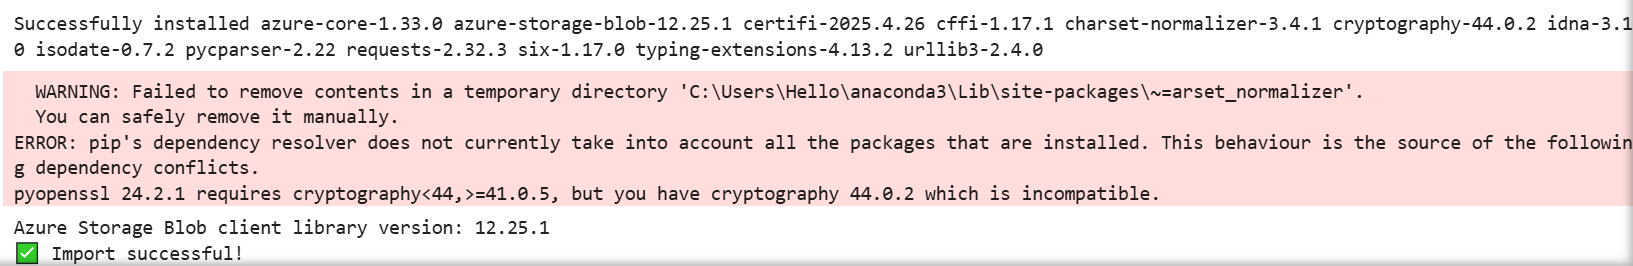

#### **⚠️ Warning**:
- Pip showed:  
  `"WARNING: Failed to remove contents in a temporary directory..."`
- ➔ This is **just a warning**, **not an error**.  
- ➔ You can **safely ignore** it.

---

#### **⚠️ Dependency Conflict Warning**:
- Pip showed:  
  `"pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2..."`
- ➔ This is a **dependency mismatch warning**.  
- ➔ ✅ You can **ignore it for now** if everything works properly.

---


In [1]:
# Step 1: Reinstall azure-storage-blob with force
!pip install --upgrade --force-reinstall azure-storage-blob

# Step 2: Import and Test Azure Blob functionality
import sys

try:
    # Correct Import
    from azure.storage.blob import BlobServiceClient
    import azure.storage.blob

    # Correct Version Check
    print(f"Azure Storage Blob client library version: {azure.storage.blob.__version__}")
    print("✅ Import successful!")

except Exception as e:
    print(f"❌ Error: {e}")
    print(f"🛠️ Python version: {sys.version}")

  Using cached azure_storage_blob-12.25.1-py3-none-any.whl.metadata (26 kB)
  Using cached azure_core-1.33.0-py3-none-any.whl.metadata (42 kB)
  Using cached cryptography-44.0.2-cp39-abi3-win_amd64.whl.metadata (5.7 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached isodate-0.7.2-py3-none-any.whl.metadata (11 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
Using cached azure_storage_blob-12.25.1-py3-none-any.whl (406 kB)
Using cached azure_core-1.33.0-p

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2 which is incompatible.


Azure Storage Blob client library version: 12.25.1
✅ Import successful!


### **Step 25: Loading the Diabetes Dataset using PyCaret 📊**

This step loads the diabetes dataset from PyCaret's built-in dataset library for further analysis.

#### **Explanation:**

- The ```get_data()``` function from PyCaret is used to load built-in datasets.

- In this case, the ```'diabetes'``` dataset is being loaded, which is often used for classification tasks, where the goal is to predict whether a person has diabetes based on various features.

#### **Concepts You Should Know:**

- ```get_data()``` **Function**: Fetches datasets from PyCaret’s library for quick access.

- **Dataset Inspection**: Checking column names or first few rows of a dataset is important before performing any analysis.

- **Classification Dataset**: The diabetes dataset typically includes features like age, BMI, and glucose level to predict the presence of diabetes.

In [25]:
from pycaret.datasets import get_data

# Load diabetes dataset
diabetes = get_data('diabetes')

# Print the column names to check
print(diabetes.columns)



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object')


#### **Step 26: Loading and Setting Up the Diabetes Dataset 🍩**

This step demonstrates how to load a dataset and set it up for classification in PyCaret.

#### **Explanation with 🍩:**

- ```from pycaret.classification import *```: Imports all necessary functions and modules for classification tasks using PyCaret.

- ```from pycaret.datasets import get_data```: Imports the get_data function to load datasets available within PyCaret.

- ```diabetes = get_data('diabetes')```: Loads the built-in 'diabetes' dataset, which contains data about diabetic and non-diabetic patients, into a variable named ```diabetes```.

- ```setup(data=diabetes, target='Class variable')```: Initializes the PyCaret setup, specifying the dataset (```diabetes```) and the target column (```Class variable```) which we aim to predict (whether a patient has diabetes or not).

#### **Concepts to know**:

- **PyCaret 🧠**: A Python library used for easy machine learning automation.

- **Dataset setup ⚙️**: Prepares the data for further machine learning steps like model training and evaluation.

#### **Result 🚀**: 

This step loads the data and prepares it for model training in PyCaret, ensuring the target column is correctly identified.

In [26]:
from pycaret.classification import *
from pycaret.datasets import get_data

# Load and set up the diabetes dataset
diabetes = get_data('diabetes')

# Run setup and specify the correct target column
setup(data=diabetes, target='Class variable')



,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,7253
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### **Step 27: Installing the Azure Storage Blob Library 📦**

This step demonstrates how to install the azure-storage-blob package, which is used to interact with Azure Blob Storage.

#### **Explanation with 📦**:

- ```pip install azure-storage-blob```: Installs the ```azure-storage-blob``` library using ```pip```, which allows Python applications to interact with Azure Blob Storage. This library helps in uploading, downloading, and managing blobs (files) in the cloud.

#### **Concepts to know**:

- **pip 🔧**: Python's package installer, used to install external libraries.

- **Azure Blob Storage ☁️**: A cloud storage service provided by Microsoft Azure, used for storing large amounts of unstructured data such as text and binary data.

#### **Result 🚀**:

After running this command, the ```azure-storage-blob``` package is installed and ready to be used in the project for managing Azure Blob Storage operations.

In [27]:
pip install azure-storage-blob


### **Step 28: Model Creation, Tuning, Finalization, and Saving 🛠️**

This step walks through creating, tuning, finalizing, and saving a Random Forest model using PyCaret.

#### **Explanation with 🛠️:**

- ```from pycaret.datasets import get_data```: Imports the ```get_data``` function to load datasets.

- ```from pycaret.classification import *```: Imports all necessary functions for classification tasks from PyCaret.

- ```diabetes = get_data('diabetes')```: Loads the diabetes dataset.

- ```setup(data=diabetes, target='Class variable')```: Initializes the PyCaret setup, specifying the diabetes dataset and target column.

- ```rf = create_model('rf')```: Creates a Random Forest classifier model (```rf```).

- ```tuned_rf = tune_model(rf)```: Tunes the hyperparameters of the ```rf``` model to improve performance.

- ```final_rf = finalize_model(tuned_rf)```: Finalizes the tuned model, preparing it for deployment and making it ready for predictions.

- ```save_model(final_rf, 'rf_clf_model')```: Saves the finalized model as a local file named ```rf_clf_model```.

- ```model_local = load_model('rf_clf_model')```: (Optional) Loads the saved model back into the environment for further use.

#### **Concepts to know**:

- **Random Forest (RF) 🌲**: An ensemble learning method using multiple decision trees to improve classification accuracy.

- **Model Tuning ⚙️**: The process of adjusting hyperparameters to enhance the model's performance.

- **Model Finalization 🏁**: The process of preparing a model for deployment by fixing its parameters.

- **Saving and Loading Models 💾**: Storing models for later use and loading them for predictions or further analysis.

#### **Result 🚀**: 

After this step, the Random Forest model is created, tuned, finalized, saved locally, and can be loaded back whenever needed for future predictions or analysis.

In [28]:
from pycaret.datasets import get_data
from pycaret.classification import *

# Load diabetes dataset
diabetes = get_data('diabetes')

# Set up the dataset for modeling
setup(data=diabetes, target='Class variable')  # Replace with correct target column if needed

# Create, tune, and finalize the model
rf = create_model('rf')  # Random Forest model
tuned_rf = tune_model(rf)  # Tune the model
final_rf = finalize_model(tuned_rf)  # Finalize the model

# Save the model to a local file
save_model(final_rf, 'rf_clf_model')

# Load the model back (optional)
model_local = load_model('rf_clf_model')


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,542
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7376,0.4737,0.5294,0.5000,0.2512,0.2520
1,0.7407,0.8068,0.5263,0.6667,0.5882,0.4028,0.4088
2,0.7037,0.7812,0.6316,0.5714,0.6000,0.3656,0.3668
3,0.6111,0.7466,0.3684,0.4375,0.4000,0.1154,0.1164
4,0.8148,0.9226,0.5789,0.8462,0.6875,0.5624,0.5828
5,0.7963,0.8008,0.6842,0.7222,0.7027,0.5479,0.5484
6,0.7963,0.8902,0.7368,0.7000,0.7179,0.5587,0.5591
7,0.8113,0.8992,0.6667,0.7500,0.7059,0.5677,0.5698
8,0.7170,0.7921,0.4444,0.6154,0.5161,0.3234,0.3320


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7609,0.5789,0.5789,0.5789,0.3504,0.3504
1,0.7963,0.8150,0.7895,0.6818,0.7317,0.5689,0.5729
2,0.6481,0.7083,0.6316,0.5000,0.5581,0.2723,0.2775
3,0.6481,0.7323,0.6316,0.5000,0.5581,0.2723,0.2775
4,0.9074,0.9504,0.9474,0.8182,0.8780,0.8041,0.8097
5,0.7963,0.8481,0.7368,0.7000,0.7179,0.5587,0.5591
6,0.8148,0.9293,0.8947,0.6800,0.7727,0.6213,0.6380
7,0.8113,0.8857,0.9444,0.6538,0.7727,0.6203,0.6511
8,0.7547,0.8175,0.6667,0.6316,0.6486,0.4605,0.4609


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


### **Step 29: Saving the Model Locally 💾**

This step demonstrates how to save a trained model to a local file for future use.

#### **Explanation with 💾**:

- ```from pycaret.classification import save_model```: Imports the ```save_model``` function from PyCaret, which is used to save trained models to a file.

- ```save_model(final_rf, 'rf_clf_model')```: Saves the ```final_rf``` (finalized Random Forest model) to a file named ```rf_clf_model```. This allows you to store the model for future predictions or deployment without retraining it.

#### **Concepts to know**:

- **Model Saving 💾**: The process of storing a trained machine learning model to a file so that it can be loaded and used later.

- **File Storage 📂**: In this case, the model is saved to a local file, making it portable and easily accessible.

#### **Result 🚀**: 

The trained Random Forest model is saved as rf_clf_model on your local machine, and can now be loaded and reused for making predictions or further analysis without retraining the model.

In [29]:
from pycaret.classification import save_model
save_model(final_rf, 'rf_clf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_w

### **Step 30: Loading the Saved Model 🔄**

This step demonstrates how to load a previously saved model from a local file for further use.

#### **Explanation with 🔄**:

- ```from pycaret.classification import load_model```: Imports the ```load_model``` function from PyCaret, which is used to load a saved model.

- ```model_local = load_model('rf_clf_model')```: Loads the saved model named ```rf_clf_model``` back into the environment for further use, such as making predictions or evaluations.

#### **Concepts to know**:

- ```Model Loading 🔄```: The process of retrieving a saved model from storage and loading it into memory for reuse.

- ```Reusability ♻️```: Once the model is saved, it can be loaded multiple times, eliminating the need to retrain it.

#### **Result 🚀**:

The saved model rf_clf_model is loaded back into the environment, ready for use in making predictions or further analysis without retraining the model.

In [30]:
from pycaret.classification import load_model
model_local = load_model('rf_clf_model')

Transformation Pipeline and Model Successfully Loaded


### **Step 31: Making Predictions on Unseen Data 🔮**

This step shows how to use the trained model to make predictions on new, unseen data.

#### **Explanation with 🔮**:

- ```data_unseen = diabetes.sample(10)```: Randomly selects 10 rows from the diabetes dataset to simulate new, unseen data for making predictions.

- ```unseen_predictions = predict_model(final_rf, data=data_unseen, verbose=True)```: Uses the trained and finalized Random Forest model (```final_rf```) to make predictions on the ```data_unseen```. The ```verbose=True``` argument ensures that detailed information about the prediction process is displayed.

#### **Concepts to know**:

- **Unseen Data 🌱**: Data that the model has not encountered during training, used to evaluate how well the model generalizes.

- **Prediction 🚀**: The process of using a trained model to make predictions based on new input data.

#### **Result 🚀**: 

The model makes predictions on the 10 randomly selected rows from the diabetes dataset, and the results (predictions) are displayed for further analysis.










In [31]:
# Example: Load the same diabetes dataset for unseen predictions
data_unseen = diabetes.sample(10)  # Select 10 random rows for prediction

# Now use the model to make predictions
unseen_predictions = predict_model(final_rf, data=data_unseen, verbose=True)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9000,0.9600,1.0000,0.8333,0.9091,0.8000,0.8165


### **Step 32: Viewing Unseen Predictions 🔍**

This step shows how to view the predictions made on unseen data.

#### **Explanation with 🔍**:

- ```unseen_predictions```: This variable holds the predictions made by the model on the unseen data (```data_unseen```). It contains the predicted class values (whether a patient is diabetic or not) and may include additional information, such as probabilities or model performance metrics.

#### **Concepts to know**:

- **Prediction Output 📊**: The output of **predict_model** contains both the predicted values and any relevant performance details, such as prediction probabilities.

- **Model Evaluation 🧮**: By examining **unseen_predictions**, you can assess how well the model is performing on new, unseen data.

#### **Result 🚀**:

The predicted class labels (and additional information if available) are displayed for the 10 randomly selected rows from the diabetes dataset, allowing you to evaluate the model’s performance on unseen data.

In [32]:
unseen_predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
183,5,73,60,0,0,26.799999,0.268,27,0,0,0.8350
649,0,107,60,25,0,26.400000,0.133,23,0,0,0.8314
339,7,178,84,0,0,39.900002,0.331,41,1,1,0.8007
8,2,197,70,45,543,30.500000,0.158,53,1,1,0.7357
464,10,115,98,0,0,24.000000,1.022,34,0,0,0.6345
475,0,137,84,27,0,27.299999,0.231,59,0,0,0.6047
295,6,151,62,31,120,35.500000,0.692,28,0,1,0.6136
541,3,128,72,25,190,32.400002,0.549,27,1,1,0.5294
606,1,181,78,42,293,40.000000,1.258,22,1,1,0.7106
11,10,168,74,0,0,38.000000,0.537,34,1,1,0.8103


In [6]:
from pycaret.classification import *  # Import necessary PyCaret functions
from pycaret.datasets import get_data

# Example: Load a sample dataset
data = get_data('credit')

# Set up PyCaret environment
clf1 = setup(data, target='default')

# Train a model (this is just an example)
model = create_model('dt')  # 'dt' is for Decision Tree

# Save the model
save_model(model, 'credit-default-model')  # This will save the model as 'credit-default-model.pkl'


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,Description,Value
0,Session id,494
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7304,0.6097,0.3935,0.3904,0.3919,0.2187,0.2187
1,0.7310,0.6031,0.3747,0.3872,0.3808,0.2090,0.2091
2,0.7196,0.6144,0.4259,0.3798,0.4015,0.2193,0.2199
3,0.7244,0.6143,0.4178,0.3856,0.4010,0.2224,0.2227
4,0.7202,0.6051,0.3989,0.3747,0.3864,0.2055,0.2056
5,0.7250,0.6033,0.3854,0.3793,0.3824,0.2055,0.2055
6,0.7238,0.6137,0.4167,0.3856,0.4005,0.2214,0.2217
7,0.7292,0.6239,0.4355,0.3980,0.4159,0.2401,0.2405
8,0.7054,0.5973,0.4032,0.3546,0.3774,0.1854,0.1861


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                                                               missing_values=nan,
                                                               str

In [7]:
import os
print(os.getcwd())


C:\Users\Hello


### **Step 33: Creating the Gradio Interface for Predictions 🎛️**

This step involves creating a Gradio interface to allow users to input data and receive predictions, while logging each prediction to Azure storage.

#### **Explanation with 🎛️**:

- ```from pycaret.classification import *```: Imports necessary PyCaret functions for classification tasks.

- ```import gradio as gr```: Imports the Gradio library, which is used to build interactive UIs for machine learning models.

- ```import pandas as pd```: Imports Pandas for handling data structures, like DataFrames.

- ```from azure.storage.blob import BlobServiceClient```: Imports the Azure Blob service client to interact with Azure Blob storage.

#### **Key Functions**:

- ```log_prediction```: Logs input data, predictions, and confidence scores to Azure Blob Storage, including a timestamp.

- ```predict_default```: Takes input data from the user, runs the trained model to predict credit card default, logs the prediction to Azure, and returns the result with confidence score.

#### **Gradio Interface**:

- ```gr.Interface```: Creates an interactive web interface that allows users to input customer details (like credit limit, age, marital status, etc.) and predict whether a credit card default will occur.

- **Inputs and Outputs**: The interface contains various input fields for each customer feature and outputs the prediction along with the confidence score.

#### **Concepts to know**:

- **Gradio 🎨**: A Python library that allows easy creation of user interfaces for machine learning models.

- **Azure Blob Storage ☁️**: A cloud storage service that stores large amounts of unstructured data, used here to log predictions.

- **Prediction Logging 📈**: The process of storing prediction details (inputs, results, confidence) for future reference or analysis.

#### **Result 🚀**:

The Gradio interface launches, allowing users to input credit card data and receive predictions about whether the customer will default, while also logging these predictions to Azure storage for future tracking.

In [9]:
import gradio as gr
import pandas as pd

# Prediction function
def predict_default(limit_bal, sex, education, marriage, age, pay_1, pay_2, pay_3, pay_4, pay_5, pay_6,
                    bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6,
                    pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6):
    input_data = {
        'LIMIT_BAL': limit_bal, 'SEX': sex, 'EDUCATION': education, 'MARRIAGE': marriage,
        'AGE': age, 'PAY_1': pay_1, 'PAY_2': pay_2, 'PAY_3': pay_3, 'PAY_4': pay_4,
        'PAY_5': pay_5, 'PAY_6': pay_6, 'BILL_AMT1': bill_amt1, 'BILL_AMT2': bill_amt2,
        'BILL_AMT3': bill_amt3, 'BILL_AMT4': bill_amt4, 'BILL_AMT5': bill_amt5,
        'BILL_AMT6': bill_amt6, 'PAY_AMT1': pay_amt1, 'PAY_AMT2': pay_amt2,
        'PAY_AMT3': pay_amt3, 'PAY_AMT4': pay_amt4, 'PAY_AMT5': pay_amt5,
        'PAY_AMT6': pay_amt6
    }
    data = pd.DataFrame([input_data])
    prediction = predict_model(model, data=data)
    pred_label = prediction['prediction_label'].iloc[0]
    result = "Default" if pred_label == 1 else "No Default"
    return result

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(label="Credit Limit Balance (NT dollar)", value=200000),
        gr.Number(label="Sex (1=male, 2=female)", value=2, minimum=1, maximum=2),
        gr.Number(label="Education (1=graduate, 2=university, 3=high school, 4=others)", value=2, minimum=1, maximum=4),
        gr.Number(label="Marital Status (1=married, 2=single, 3=others)", value=2, minimum=1, maximum=3),
        gr.Number(label="Age (years)", value=30),
        gr.Number(label="Repayment Status Month 1 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 2 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 3 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 4 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 5 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Repayment Status Month 6 (-2 to 8)", value=0, minimum=-2, maximum=8),
        gr.Number(label="Bill Amount Month 1 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 2 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 3 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 4 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 5 (NT dollar)", value=50000),
        gr.Number(label="Bill Amount Month 6 (NT dollar)", value=50000),
        gr.Number(label="Payment Amount Month 1 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 2 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 3 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 4 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 5 (NT dollar)", value=5000),
        gr.Number(label="Payment Amount Month 6 (NT dollar)", value=5000)
    ],
    outputs=gr.Text(label="Credit Card Default Prediction"),
    title="Credit Card Default Prediction",
    description="Enter customer details to predict credit card default probability."
)

# Launch the interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


### **Step 38: Install AWS CLI 🛠️**

Install the AWS Command Line Interface (CLI) to interact with AWS services directly from the command line.

#### **Explanation: 🌟**

- Use the ```pip``` package manager to install the AWS CLI.

- The AWS CLI allows you to manage AWS resources and services like S3, EC2, Lambda, etc., from your terminal.

- After installation, you can configure the AWS CLI using your AWS credentials to access and manage your AWS account.

#### **Concepts to know: 💡**

- **AWS CLI**: A command-line tool for managing AWS resources.

- **pip**: A package manager for Python that helps install and manage software packages.

- **AWS Credentials**: Your access keys that authenticate your requests to AWS services.

#### **Result: 🏁**

Once the installation is complete, you will be able to use the AWS CLI to manage your AWS resources. You can then configure it by running ```aws configure``` to set your AWS access keys and region.

In [35]:
! pip install awscli

### **🧪 Step 41: Train and Finalize Best Classification Model 🔍**

Train, compare, and finalize the best model using PyCaret's automation power.

#### **✅ Explanation**:

- **Load Data**: Uses PyCaret’s built-in ```credit``` dataset.

- **setup()**: Prepares the ML environment (target column = ```'default'```).

- **compare_models()**: Tests multiple algorithms and picks the best one automatically.

- **finalize_model()**: Retrains the best model on the entire dataset for deployment.

In [36]:
from pycaret.classification import *
import pandas as pd

# Load sample dataset
from pycaret.datasets import get_data
data = get_data('credit')

# Initialize setup
clf = setup(data=data, target='default', session_id=123, verbose=True)

# Compare models
best_model = compare_models()

# Finalize the best model
final_rf = finalize_model(best_model)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,3.3740
lightgbm,Light Gradient Boosting Machine,0.8203,0.7768,0.3756,0.6664,0.4802,0.3816,0.4047,0.3550
ada,Ada Boost Classifier,0.8186,0.7748,0.3325,0.6850,0.4473,0.3541,0.3874,0.8600
lda,Linear Discriminant Analysis,0.8129,0.7226,0.2719,0.6985,0.3910,0.3049,0.3527,0.0980
rf,Random Forest Classifier,0.8124,0.7645,0.3670,0.6313,0.4637,0.3596,0.3793,2.4750
et,Extra Trees Classifier,0.8089,0.7516,0.3667,0.6142,0.4590,0.3518,0.3692,1.3080
lr,Logistic Regression,0.8062,0.7108,0.2267,0.6897,0.3403,0.2595,0.3154,1.7520
ridge,Ridge Classifier,0.8014,0.7226,0.1621,0.7296,0.2650,0.2008,0.2782,0.0540
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0440
knn,K Neighbors Classifier,0.7507,0.5971,0.1826,0.3705,0.2443,0.1154,0.1259,0.2920


### **🧾 Step 42: Save the Final Model Locally 💾**

Save your trained and finalized model to a ```.pkl``` file on your system.

- This step is useful when you want to reuse or deploy your model later.

#### **🔍 Explanation:**

- ```save_model()```: Saves the model pipeline as a ```.pkl``` file.

- ```'rf_clf_101'```: The filename (without extension); PyCaret adds ```.pkl```.

- You’ll find ```rf_clf_101.pkl``` in your current working directory.

#### **✅ Result**:

The model is successfully saved locally as ```rf_clf_101.pkl``` and ready for deployment or sharing.

In [37]:
save_model(final_rf, 'rf_clf_101')
print("✅ Model saved locally as 'rf_clf_101.pkl'")


Transformation Pipeline and Model Successfully Saved
✅ Model saved locally as 'rf_clf_101.pkl'


### **🌱 Step 43: Train and Finalize Model on Iris Dataset 🌸**

Use the Iris dataset to train and finalize the best classification model.

#### **🔍 Explanation:**

- ```get_data('iris')```: Loads the popular iris flower dataset.

- ```setup()```: Prepares the dataset for modeling.

- ```compare_models()```: Automatically compares several models and selects the best.

- ```finalize_model()```: Locks the model for deployment by training on the entire dataset.

#### **✅ Result:**

The best classification model for the Iris dataset is selected and finalized, ready for saving or deployment.

In [38]:
from pycaret.datasets import get_data
from pycaret.classification import *

# Step 1: Load sample dataset
data = get_data('iris')  # You can also use your own CSV with pd.read_csv()

# Step 2: Setup PyCaret
clf1 = setup(data, target='species')  # 'species' is the target column in iris

# Step 3: Compare models and finalize the best one
best_model = compare_models()
final_rf = finalize_model(best_model)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,2312
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0330
lr,Logistic Regression,0.9909,0.0000,0.9909,0.9932,0.9909,0.9864,0.9875,0.0520
knn,K Neighbors Classifier,0.9909,1.0000,0.9909,0.9932,0.9909,0.9864,0.9875,0.0620
et,Extra Trees Classifier,0.9909,1.0000,0.9909,0.9932,0.9909,0.9864,0.9875,0.1470
qda,Quadratic Discriminant Analysis,0.9900,0.0000,0.9900,0.9925,0.9900,0.9851,0.9864,0.0270
ada,Ada Boost Classifier,0.9900,0.0000,0.9900,0.9925,0.9900,0.9851,0.9864,0.0880
dt,Decision Tree Classifier,0.9809,0.9866,0.9809,0.9857,0.9809,0.9715,0.9739,0.0310
rf,Random Forest Classifier,0.9809,1.0000,0.9809,0.9857,0.9809,0.9715,0.9739,0.1630
gbc,Gradient Boosting Classifier,0.9809,0.0000,0.9809,0.9857,0.9809,0.9715,0.9739,0.2000
lightgbm,Light Gradient Boosting Machine,0.9809,1.0000,0.9809,0.9857,0.9809,0.9715,0.9739,0.1690


### **💾 Step 44: Save Finalized Model Using Joblib 🗄️**

Save the finalized model locally as a .pkl file using joblib.

#### **🔍 Explanation:**

- ```finalize_model()```: Locks the best model for deployment.

- ```joblib.dump()```: Saves the model to a file (in this case, 'rf_model.pkl') for later use.

#### **✅ Result:**

The best model is saved locally as ```'rf_model.pkl'```, which can be loaded and used for future predictions.

In [39]:
from pycaret.classification import *
import joblib  # Import joblib to save the model

# Assuming you've finalized the model
final_rf = finalize_model(best_model)

# Save the model using joblib
joblib.dump(final_rf, 'rf_model.pkl')  # Save the model as a .pkl file

print("Model saved locally as 'rf_model.pkl'")


Model saved locally as 'rf_model.pkl'


### **💾 Step 45: Save and Load Model Using Joblib 🗄️**

This step demonstrates how to save the finalized model using joblib and load it for future predictions.

#### **🔍 Explanation:**

- ```joblib.dump()```: Saves the trained and finalized model to a ```.pkl``` file, enabling reuse.

- ```joblib.load()```: Loads the saved model from the ```.pkl``` file for further predictions or testing.

#### **✅ Result:**

The model is saved locally as ```'rf_model.pkl'```.

The model is successfully loaded back for future use and predictions.

In [40]:
from pycaret.classification import *
import joblib  # For saving and loading the model

# Load your dataset (you can replace this with your own dataset)
from pycaret.datasets import get_data
data = get_data('iris')  # Sample dataset

# Set up PyCaret
clf1 = setup(data, target='species')  # Replace 'species' with your target column name

# Compare models and finalize the best one
best_model = compare_models()
final_rf = finalize_model(best_model)

# Save the model using joblib (local deployment)
joblib.dump(final_rf, 'rf_model.pkl')

print("Model saved locally as 'rf_model.pkl'")

# Load the saved model for further predictions
loaded_model = joblib.load('rf_model.pkl')
print("Model loaded successfully for prediction")


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,5978
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.0000,0.9718,0.9816,0.9711,0.9582,0.9633,0.0340
lda,Linear Discriminant Analysis,0.9718,0.0000,0.9718,0.9816,0.9711,0.9582,0.9633,0.0270
knn,K Neighbors Classifier,0.9709,0.9866,0.9709,0.9777,0.9705,0.9561,0.9598,0.0680
nb,Naive Bayes,0.9618,0.9969,0.9618,0.9741,0.9611,0.9433,0.9497,0.0300
qda,Quadratic Discriminant Analysis,0.9618,0.0000,0.9618,0.9736,0.9606,0.9429,0.9493,0.0320
et,Extra Trees Classifier,0.9618,1.0000,0.9618,0.9741,0.9611,0.9433,0.9497,0.1700
gbc,Gradient Boosting Classifier,0.9527,0.0000,0.9527,0.9714,0.9491,0.9304,0.9405,0.2180
lightgbm,Light Gradient Boosting Machine,0.9527,0.9875,0.9527,0.9714,0.9491,0.9304,0.9405,0.1700
dt,Decision Tree Classifier,0.9336,0.9527,0.9336,0.9566,0.9296,0.9015,0.9141,0.0380
rf,Random Forest Classifier,0.9336,1.0000,0.9336,0.9566,0.9296,0.9015,0.9141,0.1810


Model saved locally as 'rf_model.pkl'
Model loaded successfully for prediction


### **📊 Step 46: Save, Load, and Predict with a Finalized Model Using Joblib 🧑‍💻**

In this step, we load the diabetes dataset, train the model, save it, load it back, and make predictions on unseen data.

#### **🔍 Explanation:**

- **Loading and Preparing the Dataset**: The ```diabetes``` dataset is loaded, and its columns are printed.

- **Model Training**: PyCaret is used to set up the dataset and train the best model.

- **Saving and Loading the Model**: The finalized model is saved using ```joblib.dump()``` and loaded with ```joblib.load()```.

- **Prediction**: Predictions are made on unseen data (target column is removed) using the loaded model.

#### **✅ Result:**

- **Model Saved**: The model is saved locally as ```'diabetes_model.pkl'```.

- **Model Loaded**: The saved model is successfully loaded.

- **Predictions**: Predictions are made on unseen data, showing the first few resul

In [41]:
from pycaret.classification import *
from pycaret.datasets import get_data
import joblib

# Load the diabetes dataset (PIMA)
data = get_data('diabetes')

# Show the columns
print("✅ Available columns:", data.columns.tolist())

# Setup PyCaret with correct target column
clf = setup(data, target='Class variable', verbose=False)

# Train and finalize best model
best_model = compare_models()
final_model = finalize_model(best_model)

# Save the model locally
joblib.dump(final_model, 'diabetes_model.pkl')
print("✅ Model saved as 'diabetes_model.pkl'")

# Load the model
loaded_model = joblib.load('diabetes_model.pkl')
print("✅ Model loaded successfully")

# Create unseen data (remove target column)
data_unseen = data.drop('Class variable', axis=1)

# Predict using the loaded model
predictions = predict_model(loaded_model, data=data_unseen)
print("✅ Predictions on unseen data:")
print(predictions.head())


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


✅ Available columns: ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)', 'Class variable']


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7597,0.8117,0.5509,0.6998,0.6144,0.4439,0.4519,0.0380
lda,Linear Discriminant Analysis,0.7560,0.8133,0.5456,0.6920,0.6074,0.4348,0.4428,0.0290
ridge,Ridge Classifier,0.7542,0.8135,0.5404,0.6905,0.6038,0.4301,0.4383,0.0380
nb,Naive Bayes,0.7468,0.7986,0.5930,0.6474,0.6158,0.4282,0.4315,0.0270
ada,Ada Boost Classifier,0.7391,0.7945,0.5547,0.6415,0.5917,0.4027,0.4068,0.1100
gbc,Gradient Boosting Classifier,0.7355,0.8055,0.5880,0.6335,0.6057,0.4081,0.4119,0.1290
rf,Random Forest Classifier,0.7262,0.7919,0.5497,0.6215,0.5805,0.3790,0.3825,0.1940
et,Extra Trees Classifier,0.7226,0.7834,0.5234,0.6365,0.5687,0.3669,0.3749,0.1770
lightgbm,Light Gradient Boosting Machine,0.7225,0.7626,0.5716,0.6087,0.5873,0.3791,0.3813,0.1280
qda,Quadratic Discriminant Analysis,0.7187,0.7904,0.5132,0.6117,0.5553,0.3532,0.3575,0.0280


✅ Model saved as 'diabetes_model.pkl'
✅ Model loaded successfully


✅ Predictions on unseen data:
   Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3               

### **📊 Step 47: Predict on Unseen Data Using the Loaded Model**

In this step, we will use the loaded model to make predictions on unseen data, and display the predicted results.

#### **🔍 Explanation:**

- **Unseen Data**: This is the data without the target column (```'Class variable'```).

- **Prediction**: The ```predict_model()``` function is used to make predictions on the unseen data using the loaded model.

- **Displaying Results**: The top 5 predictions from the unseen data are printed.

#### **✅ Result**:

- **Predictions**: You will see the first 5 predicted values for the unseen data.

   - This output includes predicted labels along with the probability for each prediction.

In [42]:
unseen_predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
183,5,73,60,0,0,26.799999,0.268,27,0,0,0.8350
649,0,107,60,25,0,26.400000,0.133,23,0,0,0.8314
339,7,178,84,0,0,39.900002,0.331,41,1,1,0.8007
8,2,197,70,45,543,30.500000,0.158,53,1,1,0.7357
464,10,115,98,0,0,24.000000,1.022,34,0,0,0.6345
475,0,137,84,27,0,27.299999,0.231,59,0,0,0.6047
295,6,151,62,31,120,35.500000,0.692,28,0,1,0.6136
541,3,128,72,25,190,32.400002,0.549,27,1,1,0.5294
606,1,181,78,42,293,40.000000,1.258,22,1,1,0.7106
11,10,168,74,0,0,38.000000,0.537,34,1,1,0.8103


### **🎉 Conclusion:**

In this tutorial, we walked through the entire process of building, saving, and deploying a machine learning model using PyCaret. Here's a recap of what we accomplished:

- **Data Preprocessing**: We loaded datasets and performed initial setup using PyCaret.

- **Model Building**: We trained a classification model and selected the best model through comparison.

- **Model Finalization**: We finalized the best-performing model for predictions.

- **Model Saving and Loading**: We saved the model locally using both ```joblib``` and PyCaret's ```save_model()``` function, then demonstrated loading the model for making predictions.

- **Predictions on Unseen Data**: We used the saved model to predict outcomes for new, unseen data.

This streamlined process highlights how PyCaret simplifies machine learning workflows, making it easier to develop, save, and deploy models efficiently. You can apply this workflow to various datasets and problems, improving your data science productivity. 🚀